In [1]:
from matplotlib import pyplot
import numpy as np
from pprint import pprint

from torch.utils.data import DataLoader

import sys
sys.path.append("../src")

In [2]:
from dataloader import JEPSAMDataset

/home/zeusdric/miniconda3/envs/jeps/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ds = JEPSAMDataset(
    config_file_path="../JEPS/configs/aejeps_cfg.yaml",
    data_path="../dataset/"
)

len(ds)

usage: ipykernel_launcher.py [-h] [--cfg CFG_PATH] [--data_path DATA_PATH]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/zeusdric/.local/share/jupyter/runtime/kernel-f15b34ba-8140-42ba-bfe5-4c52384bfa93.json


1972

In [4]:
ds

In [5]:
rand_idx = np.random.randint(low=0, high=len(ds))
ex = ds[rand_idx]

print("Dataset size: ", len(ds))
print("="*100)
print("ID\t: ", ex["sample_id"])
print(">> InState\t: ", ex["in_state"].shape)
print(">> GoalState\t: ", ex["goal_state"].shape)
print(">> Desc\t:")
pprint(ex["action_desc"])
print(">> Cmd\t:")
pprint(ex["motor_cmd"])
print("="*100)

Dataset size:  1972
ID	:  2196
>> InState	:  torch.Size([3, 224, 224])
>> GoalState	:  torch.Size([3, 224, 224])
>> Desc	:
{'ids': tensor([[  2, 191, 128, 135, 193,   3,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1]]),
 'raw': 'move the :BOWL right'}
>> Cmd	:
{'ids': tensor([[  2, 135, 172, 200, 135, 196, 135,   3,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1

In [6]:
ex["action_desc"]['ids'].shape

torch.Size([1, 64])

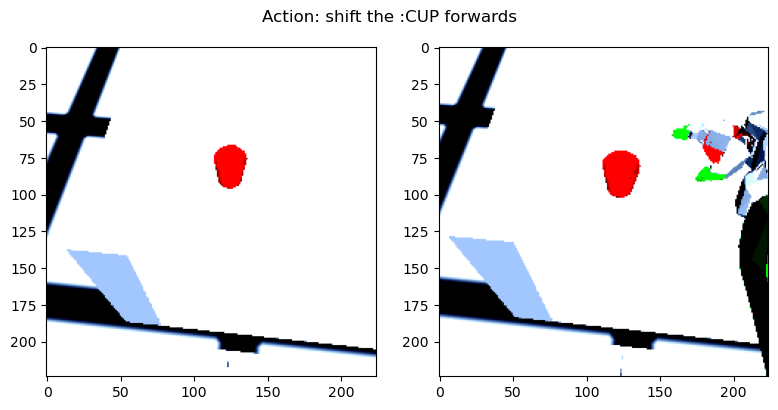

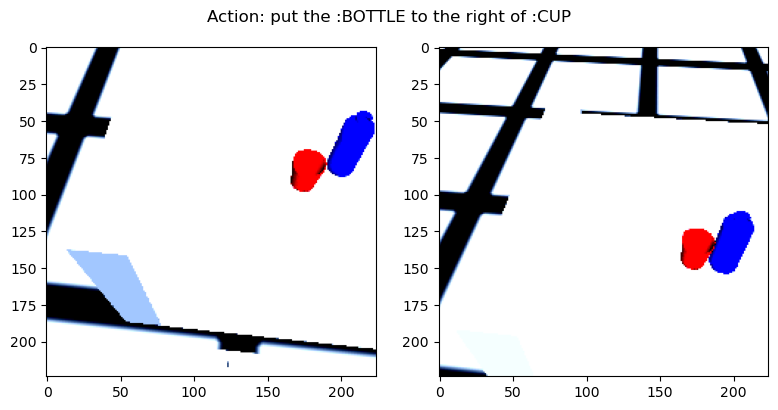

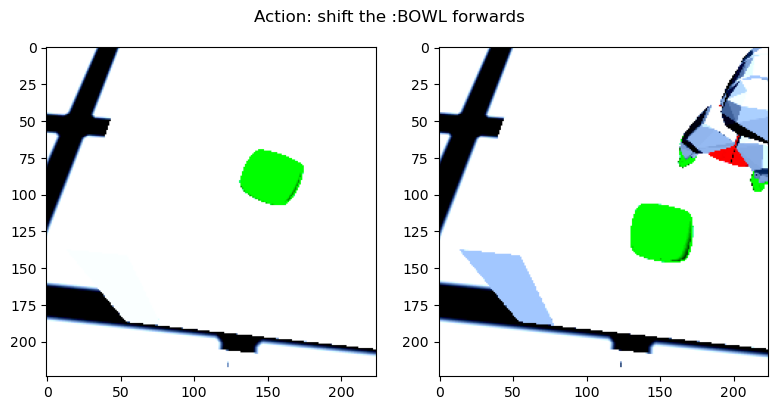

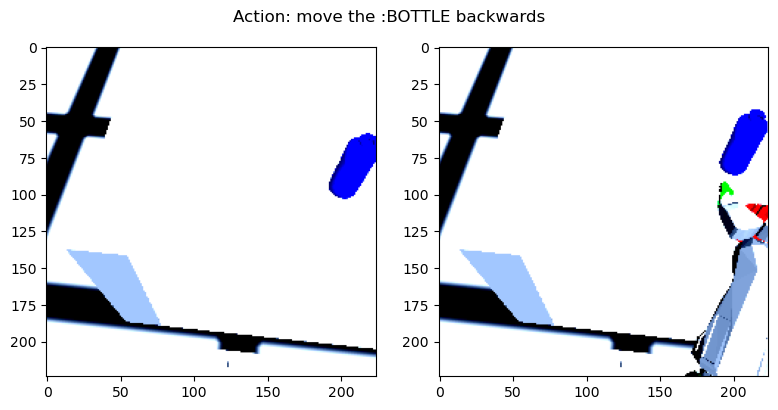

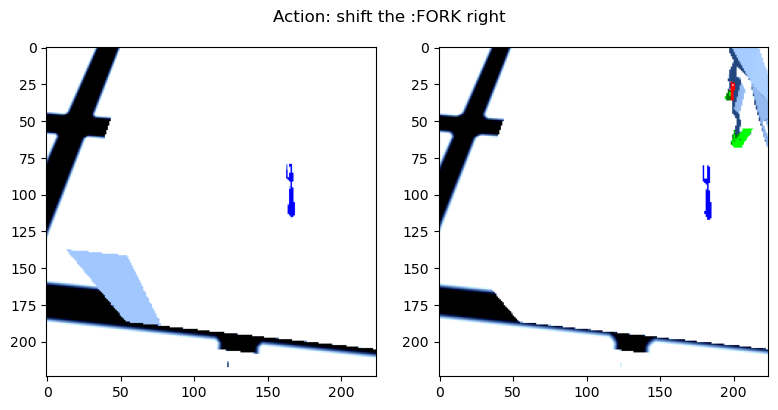

In [7]:
for _ in range(5):
    rand_idx = np.random.randint(low=0, high=len(ds))
    ex = ds[rand_idx]

    fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(8, 4))

    ax[0].imshow(ex["in_state"].permute(1, 2, 0))
    ax[1].imshow(ex["goal_state"].permute(1, 2, 0))

    desc = ex["action_desc"]["raw"]
    fig.suptitle(f"Action: {desc}")

    pyplot.tight_layout()
    pyplot.show()

## Data loading pipeline

In [8]:
dl = DataLoader(
    dataset=ds,
    batch_size=16,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

In [9]:
for data in dl:
    s_id, in_state, goal_state, ad, cmd = data['sample_id'], data['in_state'], data['goal_state'], data['action_desc'], data["motor_cmd"]
    print(in_state.shape)
    print(goal_state.shape)
    print(ad["ids"].shape)
    print(cmd["ids"].shape)
    
    break

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])
torch.Size([16, 1, 64])
torch.Size([16, 1, 128])
